# **GloVe (Global Vectors for Word Representation)**

Referensi :
[GloVe-tutorial.ipynb](https://github.com/sebtheiler/tutorials/blob/main/using-pretrained-glove-vectors/GloVe-tutorial.ipynb)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [ ]:
def create_embeddings_dict(corpus):
    embeddings_dict = {}

    for line in corpus:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

    return embeddings_dict

In [ ]:
def find_closest_embeddings(embedding, embeddings_dict):
    return sorted(embeddings_dict.keys(), key=lambda word: np.linalg.norm(embeddings_dict[word] - embedding))

In [ ]:
example_corpus = [
    "Nama 0.1 0.2 0.3",
    "Saya 0.2 0.3 0.4",
    "Muhadzib 0.3 0.4 0.5",
    "Nursaid 0.4 0.5 0.6",
    "Mahasiswa 0.7 0.8 0.9",
]

Mencari Teks yang berdekatan sesuai dengan Vektor Numerik pada Corpus

In [ ]:
# Buat kamus embeddings dari corpus
example_embeddings_dict = create_embeddings_dict(example_corpus)

# Contoh penggunaan:
print(example_embeddings_dict["Saya"])
print(find_closest_embeddings(example_embeddings_dict["Saya"], example_embeddings_dict)[1:6])

[0.2 0.3 0.4]
['Nama', 'Muhadzib', 'Nursaid', 'Mahasiswa']


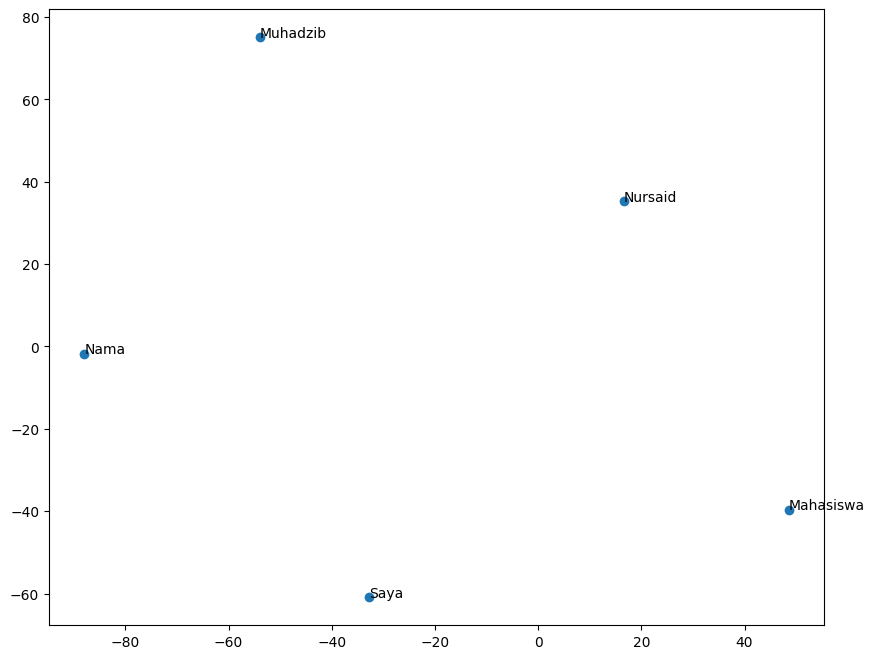

In [ ]:
# Visualisasi menggunakan t-SNE
tsne = TSNE(n_components=2, random_state=0, perplexity=4)
words = list(example_embeddings_dict.keys())
vectors = np.array([example_embeddings_dict[word] for word in words])  # Mengubah ke array NumPy
Y = tsne.fit_transform(vectors)

# Scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(Y[:, 0], Y[:, 1])

# Anotasi kata pada plot
for label, x, y in zip(words, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")

plt.show()

# **FastText**

In [ ]:
from gensim.models import FastText
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [ ]:
fasttext_corpus = [
    ["Nama", "Saya"],
    ["Muhadzib", "Nursaid"],
    ["Panggilan", "Nursal"],
    ["Bisa juga", "Azib"],
]

In [ ]:
# Melatih model FastText
fasttext_model = FastText(sentences=fasttext_corpus, vector_size=3, window=5, min_count=1, workers=4)

Mencari Teks yang berdekatan sesuai dengan Sub Kata pada Corpus

In [ ]:
# Fungsi untuk mencari kata-kata yang paling mirip
def find_closest_embeddings(embedding, model, top_n=5):
    return model.wv.similar_by_vector(embedding, topn=top_n)

# Contoh penggunaan:
print(fasttext_model.wv['Nama']) #Membuat Vektor Dimensi
print(find_closest_embeddings(fasttext_model.wv['Nama'], fasttext_model, top_n=5))

[-0.05337069 -0.00285936 -0.00927911]
[('Nama', 1.0), ('Saya', 0.9784554243087769), ('Bisa juga', 0.8032452464103699), ('Nursaid', 0.6985962986946106), ('Azib', 0.42069417238235474)]


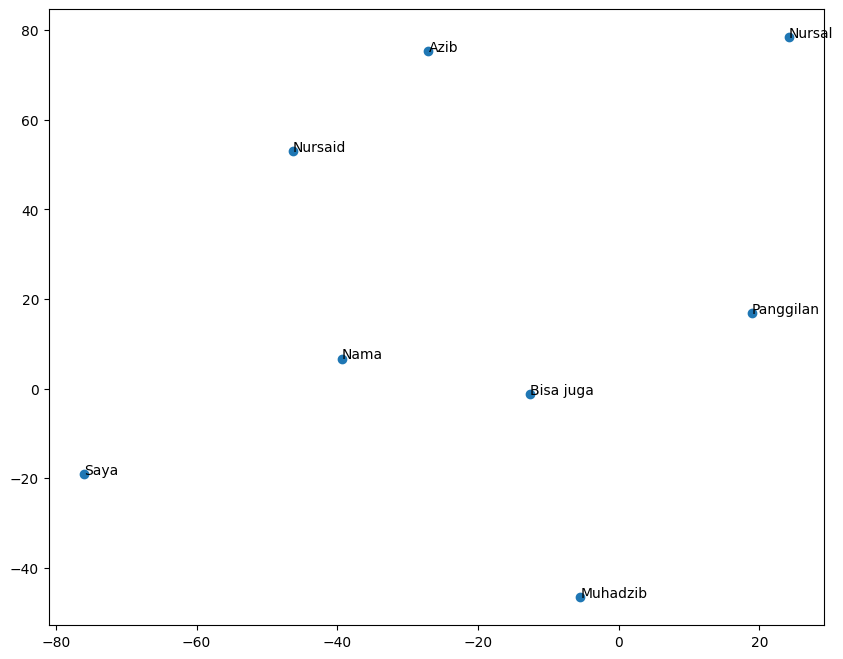

In [ ]:
# Visualisasi menggunakan t-SNE
tsne = TSNE(n_components=2, random_state=0, perplexity=3)
words = list(fasttext_model.wv.key_to_index.keys())
vectors = np.array([fasttext_model.wv[word] for word in words])
Y = tsne.fit_transform(vectors)

# Scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(Y[:, 0], Y[:, 1])

# Anotasi kata pada plot
for label, x, y in zip(words, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")

plt.show()